In [1]:
addpath('~/DKCCA/simulationFiles', '~/DKCCA/util', '~/DKCCA');

In [57]:
save_dir = '~/AADITYA_data/Pe160507_connect';
data_num = 5;

In [58]:
load(sprintf('%s/data_sim_%d.mat',save_dir,data_num))

In [59]:
size(pop_0), size(pop_1)


ans =

          50          24        1000


ans =

          50          25        1000



In [60]:
obs1 = permute(pop_0(1:2:50,:,:), [2 1 3]);
obs2 = permute(pop_1(1:2:50,:,:), [2 1 3]);

In [61]:
size(obs1), size(obs2)


ans =

          24          25        1000


ans =

          25          25        1000



In [62]:
numpermute=0;  % this is too low, but is set here for speed.  
setnumperwindow=1;
windowlength=11;
numcomponents=1;
regwindow=.7:.1:1;
gsdval=5;

In [63]:
[dcell, ca, reg, dirsa, kernelMats, corcells] = DKCCA(obs1, obs2, setnumperwindow, windowlength, numpermute, numcomponents, regwindow, gsdval);

> In regionprops>NoNDSupport (line 1440)
  In regionprops>PreprocessRequestedStats (line 1471)
  In regionprops>InitializeStatStructures (line 1411)
  In regionprops (line 228)
  In get_statistics (line 50)
  In DKCCA (line 39)
> In regionprops>NoNDSupport (line 1440)
  In regionprops>ComputeEllipseParams (line 743)
  In regionprops (line 287)
  In get_statistics (line 50)
  In DKCCA (line 39)
> In regionprops>NoNDSupport (line 1443)
  In regionprops>ComputeConvexHull (line 1042)
  In regionprops (line 303)
  In get_statistics (line 50)
  In DKCCA (line 39)


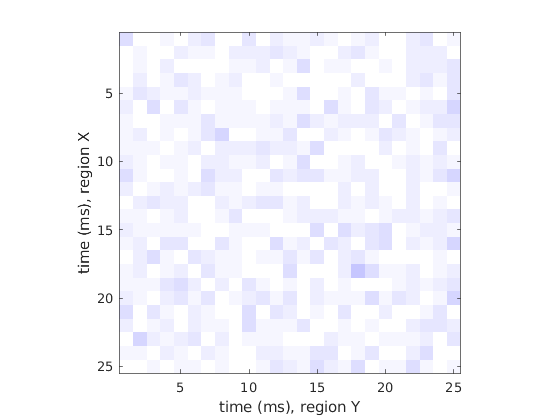

In [64]:
%plot inline

imagesc(dcell.original)
colormap rdbu
caxis([0 1])
axis square
xlabel('time (ms), region Y')
ylabel('time (ms), region X')

In [65]:
Sigma_DKCCA = dcell.original;
latent_DKCCA = corcells;
save(sprintf('%s/result_DKCCA_%d_1.mat', save_dir, data_num), 'Sigma_DKCCA', 'latent_DKCCA')